# 1D J1J2J3: Inference (2nd set w grad clipping) with 10k samples

This notebook is part of the work arXiv:2505.22083 (https://arxiv.org/abs/2505.22083), "Hyperbolic recurrent neural network as the first type of non-Euclidean neural quantum state ansatz". Code written by HLD. 


In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [46]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
color_l = ['cyan', 'green', 'pink','purple', 'brown']
def plot_res_meanE(ax, Ee, e_list, last_saved_epoch, e_names, j23, frange, legend_loc):
    for i in range(len(e_list)):
        ax.plot(np.arange(len(e_list[i])), np.real(e_list[i]),color = color_l[i], label = e_names[i])
    ax.axvline(x=last_saved_epoch[0],  ymax=0.5, color=color_l[0], linestyle='--', linewidth=2, label='eGRU_bm')
    ax.axvline(x=last_saved_epoch[1], ymax=0.5, color=color_l[1], linestyle='--', linewidth=2, label='hGRU_bm')
    ax.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylabel("Mean Energy", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",fontsize = 15)
       
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1)    
    for i in range(len(e_list)):
        ax2.plot(np.arange(len(e_list[i])), e_list[i],color = color_l[i], label = e_names[i])
    ax2.axvline(x=last_saved_epoch[0],  ymax=0.8, color=color_l[0], linestyle='--', linewidth=2, label='eGRU_bm')
    ax2.axvline(x=last_saved_epoch[1], ymax=0.8, color=color_l[1], linestyle='--', linewidth=2, label='hGRU_bm')
    ax2.axhline(Ee, color = 'red', linestyle = 'dashed', label = 'DMRG')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)
    
color_l =  ['cyan', 'green', 'pink','purple', 'brown']
def plot_res_var(ax, v_list, e_names, j23, frange, legend_loc):
    for i in range(len(v_list)):
        ax.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax.set_xlabel("Epoch", fontsize = 14)
    ax.set_ylim(-5, 45)
    ax.set_ylabel("Energy variance", fontsize = 14)
    ax.set_title(f"(J2,J3)={(j23[0], j23[1])}",
              fontsize = 15)
    ax2 = inset_axes(parent_axes=ax,width="45%",height="35%",borderpad=1 )
    for i in range(len(v_list)):
        ax2.plot(np.arange(len(v_list[i])), v_list[i],color = color_l[i], label = e_names[i])
    ax2.axhline(0.0, color = 'red', linestyle = 'dashed')
    ax2.axis(frange)
    ax.legend(loc='best', bbox_to_anchor=legend_loc)

In [38]:
fname_s2 = '../results_s2'
fname_s2_gc = '../results_s2_gc'
###################################### (J2, J3) = (0.2, 0.5) #######################################
mE02_05 = np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns50_MsTrue_var2_meanE.npy')
vE02_05 = np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_EuclGRU_60_ns=50_MsTrue_var2_varE.npy')

mEh02_05l =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns50_MsTrue_meanE.npy')
vEh02_05l =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.2|J3=0.5_HypGRU_55_id_hyp_ns=50_MsTrue_varE.npy')
print(f'The number of epochs for J2J3=(0.2, 0.5) is {len(mE02_05), len(mEh02_05l)}')
###################################### (J2, J3) = (0.5, 0.2) #######################################
mE05_02 = np.load(f'{fname_s2}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns50_MsTrue_meanE.npy')
vE05_02 = np.load(f'{fname_s2}/N30_J1=1.0|J2=0.5|J3=0.2_EuclGRU_60_ns=50_MsTrue_varE.npy')

mEh05_02_gc3 =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns50_MsTrue_meanE.npy')
vEh05_02_gc3 =np.load(f'{fname_s2_gc}/N30_J1=1.0|J2=0.5|J3=0.2_HypGRU_57_id_hyp_ns=50_MsTrue_varE.npy')
print(f'The number of epochs for J2J3=(0.5, 0.2) is {len(mE05_02), len(mEh05_02_gc3 )}')

The number of epochs for J2J3=(0.2, 0.5) is (551, 551)
The number of epochs for J2J3=(0.5, 0.2) is (551, 501)


In [42]:
E_02_05 = -14.640825798
E_05_02 = -11.528738924

#Last saved epoch corresponding to the best model
#The matrix below has the form : (eGRU, hGRU) as columns, (J2,J3)=(0.2,0.5), (0.5,0.2) as rows
#Data from training notebooks 
bm = np.array([[376, 550],[500,450]])
print('Last saved epochs with best models for J1J2J3 experiments set 2')
print(f'For (J2,J3)=(0.2,0.5), best model for eGRU is saved at epoch {bm[0,0]}/550, for hGRU is at {bm[0,1]}/550')
print(f'For (J2,J3)=(0.5,0.2), best model for eGRU is saved at epoch {bm[1,0]}/550, for hGRU is at {bm[1,1]}/500')

Last saved epochs with best models for J1J2J3 experiments set 2
For (J2,J3)=(0.2,0.5), best model for eGRU is saved at epoch 376/550, for hGRU is at 550/550
For (J2,J3)=(0.5,0.2), best model for eGRU is saved at epoch 500/550, for hGRU is at 450/500


/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_2234/2939041534.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30_add.png')


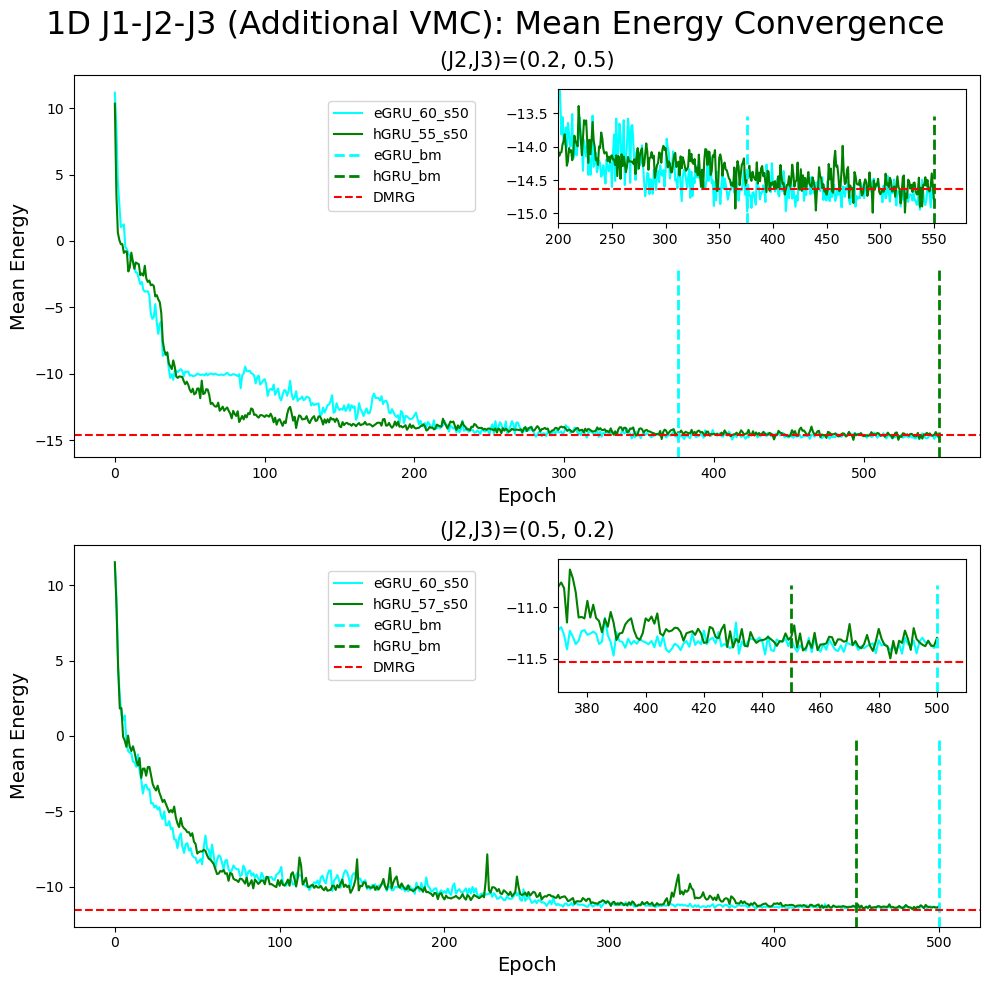

In [52]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), tight_layout=True)

e_list02_05 = [mE02_05, mEh02_05l]
e_names1 = ['eGRU_60_s50',  'hGRU_55_s50']


e_list05_02 = [mE05_02[:501], mEh05_02_gc3 ]
e_names2 = ['eGRU_60_s50',  'hGRU_57_s50']

plot_res_meanE(ax[0], E_02_05, e_list02_05,bm[0], e_names1, [0.2,0.5], [200,580, E_02_05-0.5, E_02_05+1.5], (0.15, 0.75, 0.3, 0.2))
plot_res_meanE(ax[1], E_05_02, e_list05_02,bm[1], e_names2, [0.5, 0.2], [370,510,E_05_02-0.3, E_05_02+1.0], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional VMC): Mean Energy Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30_add.png')

/var/folders/cj/1sxs7wzx40l7609nvj0b33c40000gn/T/ipykernel_2234/1224286862.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig('1D-J1-J2-J3-N=30-var_add.png')


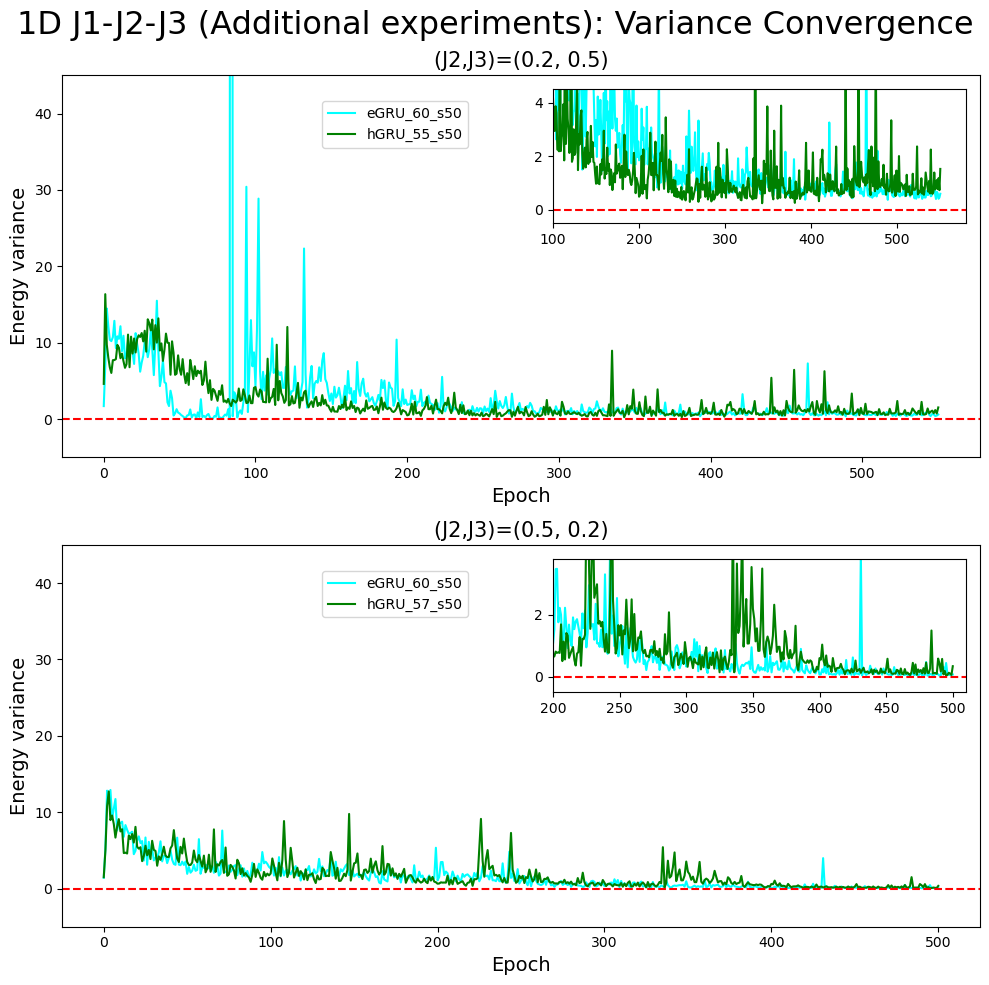

In [36]:
fig, ax = plt.subplots(2,1, figsize=(10, 10), tight_layout=True)

e_list02_05 = [vE02_05, vEh02_05l]
e_list05_02 = [vE05_02[:501], vEh05_02_gc3]

plot_res_var(ax[0],  e_list02_05, e_names1, [0.2,0.5], [100,580, -0.5, 4.5], (0.15, 0.75, 0.3, 0.2))
plot_res_var(ax[1], e_list05_02, e_names2, [0.5, 0.2], [200,510,-0.5, 3.8], (0.15, 0.75, 0.3, 0.2))

plt.suptitle('1D J1-J2-J3 (Additional experiments): Variance Convergence', fontsize = 23)
plt.savefig('1D-J1-J2-J3-N=30-var_add.png')